# Baby Names Project

Based on the name of a baby can we predict whether they are a male or female. To look at the last letter.

There are certian characteristics to know such as:
The positioning of letters in the name. 
The first letter trends.
The last letter trends. For example if a name ends in en.
The spelling of the name. 


In [1]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
state_names = pd.read_csv('output/StateNames.csv')
national_names = pd.read_csv('output/NationalNames.csv')

state_names = state_names.sample(50000)

In [3]:
state_names.head()

,Id,Name,Year,Gender,State,Count
398341,398342,Dianna,1960,F,CA,179
161209,161210,Retha,1926,F,AR,15
959808,959809,Don,1953,M,DE,6
248946,248947,Hendrix,2013,M,AR,7
416590,416591,Lawanna,1969,F,CA,6


In [4]:
#write a function to get the last letter from a string. 

def get_last_letter(name):
    return name[-1] 
    

In [5]:
get_last_letter('Annie')

'e'

In [6]:
def last_letter_name(row):
    return row['Name'][-1]
    
state_names['last_letter'] = state_names.apply(last_letter_name, axis=1)
state_names.head()

,Id,Name,Year,Gender,State,Count,last_letter
398341,398342,Dianna,1960,F,CA,179,a
161209,161210,Retha,1926,F,AR,15,a
959808,959809,Don,1953,M,DE,6,n
248946,248947,Hendrix,2013,M,AR,7,x
416590,416591,Lawanna,1969,F,CA,6,a


In [7]:
state_names_by_gender = state_names.groupby('Gender')
state_names_by_gender['last_letter'].describe()


,count,unique,top,freq
Gender,,,,
F,30003,24,a,11178
M,19997,27,n,4667


In [8]:
def first_letter(row):
    return row['Name'][0]
    
state_names['first_letter'] = state_names.apply(first_letter, axis=1)
state_names.head()
    

,Id,Name,Year,Gender,State,Count,last_letter,first_letter
398341,398342,Dianna,1960,F,CA,179,a,D
161209,161210,Retha,1926,F,AR,15,a,R
959808,959809,Don,1953,M,DE,6,n,D
248946,248947,Hendrix,2013,M,AR,7,x,H
416590,416591,Lawanna,1969,F,CA,6,a,L


In [9]:
state_names_by_gender['first_letter'].describe()

,count,unique,top,freq
Gender,,,,
F,30003,26,A,3030
M,19997,26,J,2062


In [10]:
def get_second_letter(name):
    return name[1]

In [11]:
get_second_letter('Matthew')

'a'

In [12]:
def second_letter_name(row):
    return row['Name'][1]

state_names['second_letter'] = state_names.apply(second_letter_name, axis=1)
state_names.head()

,Id,Name,Year,Gender,State,Count,last_letter,first_letter,second_letter
398341,398342,Dianna,1960,F,CA,179,a,D,i
161209,161210,Retha,1926,F,AR,15,a,R,e
959808,959809,Don,1953,M,DE,6,n,D,o
248946,248947,Hendrix,2013,M,AR,7,x,H,e
416590,416591,Lawanna,1969,F,CA,6,a,L,a


In [13]:
def gender_to_numeric(row):
    if row['Gender'] == 'M':
        return 0
    else:
        return 1
    
state_names['gender_num'] = state_names.apply(gender_to_numeric, axis=1)
state_names

,Id,Name,Year,Gender,State,Count,last_letter,first_letter,second_letter,gender_num
398341,398342,Dianna,1960,F,CA,179,a,D,i,1
161209,161210,Retha,1926,F,AR,15,a,R,e,1
959808,959809,Don,1953,M,DE,6,n,D,o,0
248946,248947,Hendrix,2013,M,AR,7,x,H,e,0
416590,416591,Lawanna,1969,F,CA,6,a,L,a,1
339814,339815,Levi,1997,M,AZ,50,i,L,e,0
66841,66842,April,1978,F,AL,374,l,A,p,1
163773,163774,Willene,1931,F,AR,11,e,W,i,1
379385,379386,Rhea,1946,F,CA,10,a,R,h,1
837853,837854,Lacey,1988,F,CT,12,y,L,a,1


In [14]:
state_names.sort_values('Gender', ascending=False)

,Id,Name,Year,Gender,State,Count,last_letter,first_letter,second_letter,gender_num
131994,131995,Ashley,1982,M,AL,20,y,A,s,0
881207,881208,Francis,2004,M,CT,8,s,F,r,0
314706,314707,Douglas,1939,M,AZ,15,s,D,o,0
587974,587975,Fermin,1950,M,CA,9,n,F,e,0
349625,349626,Deandre,2008,M,AZ,10,e,D,e,0
115242,115243,Tommie,1950,M,AL,71,e,T,o,0
927818,927819,Emmanuel,1974,M,DC,5,l,E,m,0
576440,576441,Jessie,1933,M,CA,12,e,J,e,0
650064,650065,Serjio,1992,M,CA,8,o,S,e,0
571819,571820,Clement,1925,M,CA,10,t,C,l,0


In [15]:
state_names_male = state_names[state_names.Gender == 'M'] 
state_names_female = state_names[state_names.Gender == 'F']

In [16]:
state_names_male.head()

,Id,Name,Year,Gender,State,Count,last_letter,first_letter,second_letter,gender_num
959808,959809,Don,1953,M,DE,6,n,D,o,0
248946,248947,Hendrix,2013,M,AR,7,x,H,e,0
339814,339815,Levi,1997,M,AZ,50,i,L,e,0
587816,587817,Hubert,1950,M,CA,18,t,H,u,0
105673,105674,Winfred,1931,M,AL,7,d,W,i,0


In [17]:
# Binning a numerical variable into categories
years_bins = [1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020]
decades_name = ['1910 - 1920', '1920 - 1930', '1930 - 1940','1940 - 1950','1950 - 1960', '1960 - 1970','1970 - 1980', 
           '1980 - 1990', '1990 - 2000', '2000 - 2010', '2010 - 2020']
state_names['years_bins'] = pd.cut(state_names['Year'],
                                   years_bins,
                                   labels=decades_name)

state_names.head()



,Id,Name,Year,Gender,State,Count,last_letter,first_letter,second_letter,gender_num,years_bins
398341,398342,Dianna,1960,F,CA,179,a,D,i,1,1950 - 1960
161209,161210,Retha,1926,F,AR,15,a,R,e,1,1920 - 1930
959808,959809,Don,1953,M,DE,6,n,D,o,0,1950 - 1960
248946,248947,Hendrix,2013,M,AR,7,x,H,e,0,2010 - 2020
416590,416591,Lawanna,1969,F,CA,6,a,L,a,1,1960 - 1970


In [18]:
state_names.iloc[1:3,1]

161209    Retha
959808      Don
Name: Name, dtype: object

In [19]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [20]:
final_string = ''
for name, count in zip(state_names.Name, state_names.Count):
    final_string = final_string + count * (' ' + name)
    
final_string[:100]

' Dianna Dianna Dianna Dianna Dianna Dianna Dianna Dianna Dianna Dianna Dianna Dianna Dianna Dianna D'

In [21]:

wordcloud = WordCloud(collocations=False).generate(final_string)

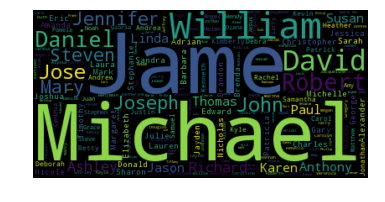

In [22]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [23]:
state_names.head()

,Id,Name,Year,Gender,State,Count,last_letter,first_letter,second_letter,gender_num,years_bins
398341,398342,Dianna,1960,F,CA,179,a,D,i,1,1950 - 1960
161209,161210,Retha,1926,F,AR,15,a,R,e,1,1920 - 1930
959808,959809,Don,1953,M,DE,6,n,D,o,0,1950 - 1960
248946,248947,Hendrix,2013,M,AR,7,x,H,e,0,2010 - 2020
416590,416591,Lawanna,1969,F,CA,6,a,L,a,1,1960 - 1970


In [24]:
state_names_20s = state_names[state_names.years_bins == '1920 - 1930']

In [25]:
state_names_20s.head()

,Id,Name,Year,Gender,State,Count,last_letter,first_letter,second_letter,gender_num,years_bins
161209,161210,Retha,1926,F,AR,15,a,R,e,1,1920 - 1930
160477,160478,Vivian,1925,F,AR,69,n,V,i,1,1920 - 1930
889023,889024,Theresa,1929,F,DC,12,a,T,h,1,1920 - 1930
570598,570599,Eduardo,1923,M,CA,12,o,E,d,0,1920 - 1930
361095,361096,Madalyn,1921,F,CA,5,n,M,a,1,1920 - 1930


In [26]:
nineteen_twenties = ''
for name, count in zip(state_names.Name, state_names.Count):
    nineteen_twenties = nineteen_twenties + count * (' ' + name)
    
nineteen_twenties[:100]


' Dianna Dianna Dianna Dianna Dianna Dianna Dianna Dianna Dianna Dianna Dianna Dianna Dianna Dianna D'

In [27]:
wordcloud = WordCloud(collocations=False).generate(nineteen_twenties)

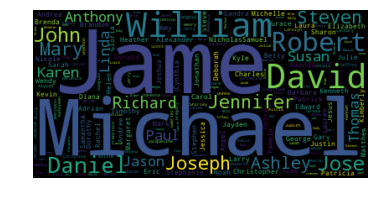

In [28]:
plt.clf()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [29]:
state_names_80s = state_names[state_names.years_bins == '1980 - 1990']

In [30]:
state_names_80s.head()

,Id,Name,Year,Gender,State,Count,last_letter,first_letter,second_letter,gender_num,years_bins
837853,837854,Lacey,1988,F,CT,12,y,L,a,1,1980 - 1990
788317,788318,Terrence,1982,M,CO,6,e,T,e,0,1980 - 1990
189016,189017,Candy,1985,F,AR,8,y,C,a,1,1980 - 1990
874497,874498,Isiah,1989,M,CT,8,h,I,s,0,1980 - 1990
459591,459592,Mellissa,1987,F,CA,26,a,M,e,1,1980 - 1990


In [31]:
nineteen_eighties = ''
for name, count in zip(state_names.Name, state_names.Count):
    nineteen_eighties = nineteen_eighties + count * (' ' + name)
    
nineteen_eighties[:100]



' Dianna Dianna Dianna Dianna Dianna Dianna Dianna Dianna Dianna Dianna Dianna Dianna Dianna Dianna D'

In [32]:
wordcloud = WordCloud(collocations=False).generate(nineteen_eighties)

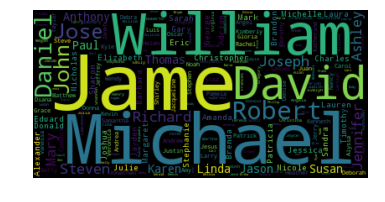

In [33]:
plt.clf()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [35]:
state_names.head()

,Id,Name,Year,Gender,State,Count,last_letter,first_letter,second_letter,gender_num,years_bins
398341,398342,Dianna,1960,F,CA,179,a,D,i,1,1950 - 1960
161209,161210,Retha,1926,F,AR,15,a,R,e,1,1920 - 1930
959808,959809,Don,1953,M,DE,6,n,D,o,0,1950 - 1960
248946,248947,Hendrix,2013,M,AR,7,x,H,e,0,2010 - 2020
416590,416591,Lawanna,1969,F,CA,6,a,L,a,1,1960 - 1970


In [36]:
state_names.dropna(subset=[['first_letter', 'second_letter' , 'last_letter']], inplace=True)
dummy_df = pd.get_dummies(state_names[['first_letter', 'second_letter', 'last_letter']])
state_names = pd.concat([state_names, dummy_df], axis=1)
state_names.head()

,Id,Name,Year,Gender,State,Count,last_letter,first_letter,second_letter,gender_num,...,last_letter_q,last_letter_r,last_letter_s,last_letter_t,last_letter_u,last_letter_v,last_letter_w,last_letter_x,last_letter_y,last_letter_z
398341,398342,Dianna,1960,F,CA,179,a,D,i,1,...,0,0,0,0,0,0,0,0,0,0
161209,161210,Retha,1926,F,AR,15,a,R,e,1,...,0,0,0,0,0,0,0,0,0,0
959808,959809,Don,1953,M,DE,6,n,D,o,0,...,0,0,0,0,0,0,0,0,0,0
248946,248947,Hendrix,2013,M,AR,7,x,H,e,0,...,0,0,0,0,0,0,0,1,0,0
416590,416591,Lawanna,1969,F,CA,6,a,L,a,1,...,0,0,0,0,0,0,0,0,0,0


In [37]:
state_names.columns

Index(['Id', 'Name', 'Year', 'Gender', 'State', 'Count', 'last_letter',
       'first_letter', 'second_letter', 'gender_num', 'years_bins',
       'first_letter_A', 'first_letter_B', 'first_letter_C', 'first_letter_D',
       'first_letter_E', 'first_letter_F', 'first_letter_G', 'first_letter_H',
       'first_letter_I', 'first_letter_J', 'first_letter_K', 'first_letter_L',
       'first_letter_M', 'first_letter_N', 'first_letter_O', 'first_letter_P',
       'first_letter_Q', 'first_letter_R', 'first_letter_S', 'first_letter_T',
       'first_letter_U', 'first_letter_V', 'first_letter_W', 'first_letter_X',
       'first_letter_Y', 'first_letter_Z', 'second_letter_R',
       'second_letter_a', 'second_letter_b', 'second_letter_c',
       'second_letter_d', 'second_letter_e', 'second_letter_f',
       'second_letter_g', 'second_letter_h', 'second_letter_i',
       'second_letter_j', 'second_letter_k', 'second_letter_l',
       'second_letter_m', 'second_letter_n', 'second_letter_o',
    

In [38]:
X = state_names[['first_letter_A', 'first_letter_B', 'first_letter_C', 'first_letter_D',
       'first_letter_E', 'first_letter_F', 'first_letter_G', 'first_letter_H',
       'first_letter_I', 'first_letter_J', 'first_letter_K', 'first_letter_L',
       'first_letter_M', 'first_letter_N', 'first_letter_O', 'first_letter_P',
       'first_letter_Q', 'first_letter_R', 'first_letter_S', 'first_letter_T',
       'first_letter_U', 'first_letter_V', 'first_letter_W', 'first_letter_X',
       'first_letter_Y', 'first_letter_Z', 'second_letter_a',
       'second_letter_b', 'second_letter_c', 'second_letter_d',
       'second_letter_e', 'second_letter_f', 'second_letter_g',
       'second_letter_h', 'second_letter_i', 'second_letter_j',
       'second_letter_k', 'second_letter_l', 'second_letter_m',
       'second_letter_n', 'second_letter_o', 'second_letter_p',
       'second_letter_q', 'second_letter_r', 'second_letter_s',
       'second_letter_t', 'second_letter_u', 'second_letter_v',
       'second_letter_w', 'second_letter_x', 'second_letter_y',
       'second_letter_z', 'last_letter_a', 'last_letter_b', 'last_letter_c',
       'last_letter_d', 'last_letter_e', 'last_letter_f', 'last_letter_g',
       'last_letter_h', 'last_letter_i', 'last_letter_j', 'last_letter_k',
       'last_letter_l', 'last_letter_m', 'last_letter_n', 'last_letter_o',
       'last_letter_p', 'last_letter_q', 'last_letter_r', 'last_letter_s',
       'last_letter_t', 'last_letter_u', 'last_letter_v', 'last_letter_w',
       'last_letter_x', 'last_letter_y', 'last_letter_z']]
X = np.array(X)

In [39]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 1, 0]], dtype=uint8)

In [40]:
y = state_names['Gender']
y = np.array(y)


In [41]:
y

array(['F', 'F', 'M', ..., 'F', 'F', 'M'], dtype=object)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
y_actual = y_test

In [43]:
for a, b in zip(X_train[:5], y_train[:5]):
    print(a, b)

[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0] F
[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0] M
[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0] F
[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0] F
[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0] M


In [44]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [45]:
y_pred = model.predict(X_test)

In [46]:
for a, b in zip(y_pred, y_actual):
    print("Predicted = {0}, Actual = {1}".format(a, b))

Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = M, Actual = F
Predicted = M, Actual = M
Predicted = F, Actual = F
Predicted = M, Actual = F
Predicted = M, Actual = F
Predicted = M, Actual = M
Predicted = M, Actual = F
Predicted = F, Actual = F
Predicted = M, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = M, Actual = F
Predicted = F, Actual = F
Predicted = M, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = M
Predicted = F, Actual = F
Predicted = M, Actual = M
Predicted = M, Actual = M
Predicted = M, Actual = M
Predicted = F, Actual = M
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = M, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = M
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = 

Predicted = F, Actual = F
Predicted = M, Actual = M
Predicted = F, Actual = F
Predicted = M, Actual = F
Predicted = F, Actual = M
Predicted = M, Actual = M
Predicted = F, Actual = F
Predicted = M, Actual = M
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = M, Actual = M
Predicted = M, Actual = F
Predicted = M, Actual = F
Predicted = F, Actual = M
Predicted = F, Actual = M
Predicted = F, Actual = F
Predicted = M, Actual = M
Predicted = F, Actual = F
Predicted = M, Actual = M
Predicted = F, Actual = F
Predicted = M, Actual = M
Predicted = M, Actual = M
Predicted = F, Actual = M
Predicted = F, Actual = F
Predicted = M, Actual = M
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = M, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = M, Actual = M
Predicted = F, Actual = F
Predicted = M, Actual = M
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = M, Actual = M
Predicted = F, Actual = F
Predicted = 

Predicted = M, Actual = M
Predicted = M, Actual = M
Predicted = F, Actual = F
Predicted = M, Actual = M
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = M, Actual = M
Predicted = F, Actual = M
Predicted = F, Actual = M
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = M, Actual = M
Predicted = F, Actual = M
Predicted = F, Actual = F
Predicted = M, Actual = M
Predicted = F, Actual = F
Predicted = M, Actual = M
Predicted = M, Actual = M
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = M, Actual = M
Predicted = F, Actual = F
Predicted = M, Actual = M
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = M, Actual = M
Predicted = M, Actual = F
Predicted = F, Actual = F
Predicted = M, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = M
Predicted = F, Actual = F
Predicted = M, Actual = M
Predicted = F, Actual = F
Predicted = M, Actual = M
Predicted = M, Actual = M
Predicted = 

Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = M
Predicted = M, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = M
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = M
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = M, Actual = M
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = M
Predicted = M, Actual = M
Predicted = M, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = M
Predicted = M, Actual = F
Predicted = M, Actual = F
Predicted = F, Actual = F
Predicted = M, Actual = M
Predicted = F, Actual = M
Predicted = M, Actual = M
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = M, Actual = M
Predicted = M, Actual = F
Predicted = 

Predicted = M, Actual = M
Predicted = M, Actual = M
Predicted = F, Actual = F
Predicted = M, Actual = M
Predicted = M, Actual = F
Predicted = F, Actual = M
Predicted = F, Actual = F
Predicted = F, Actual = M
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = M, Actual = M
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = M, Actual = M
Predicted = F, Actual = M
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = M
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = M, Actual = M
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = M, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = M, Actual = F
Predicted = F, Actual = F
Predicted = M, Actual = M
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = M, Actual = M
Predicted = M, Actual = M
Predicted = 

Predicted = F, Actual = F
Predicted = M, Actual = M
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = M, Actual = M
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = M
Predicted = F, Actual = F
Predicted = F, Actual = M
Predicted = M, Actual = M
Predicted = M, Actual = F
Predicted = F, Actual = F
Predicted = M, Actual = F
Predicted = M, Actual = M
Predicted = M, Actual = M
Predicted = F, Actual = F
Predicted = F, Actual = M
Predicted = M, Actual = M
Predicted = F, Actual = F
Predicted = F, Actual = M
Predicted = F, Actual = M
Predicted = F, Actual = F
Predicted = F, Actual = M
Predicted = M, Actual = M
Predicted = F, Actual = F
Predicted = M, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = M
Predicted = 

Predicted = F, Actual = F
Predicted = M, Actual = F
Predicted = F, Actual = M
Predicted = M, Actual = M
Predicted = F, Actual = M
Predicted = M, Actual = M
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = M, Actual = M
Predicted = F, Actual = M
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = M, Actual = F
Predicted = M, Actual = M
Predicted = M, Actual = M
Predicted = M, Actual = F
Predicted = F, Actual = M
Predicted = M, Actual = M
Predicted = F, Actual = M
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = M, Actual = M
Predicted = M, Actual = M
Predicted = M, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = M, Actual = M
Predicted = M, Actual = F
Predicted = M, Actual = F
Predicted = M, Actual = M
Predicted = F, Actual = F
Predicted = M, Actual = M
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = 

Predicted = F, Actual = F
Predicted = M, Actual = M
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = M, Actual = M
Predicted = F, Actual = F
Predicted = F, Actual = M
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = M
Predicted = M, Actual = M
Predicted = M, Actual = M
Predicted = F, Actual = F
Predicted = M, Actual = M
Predicted = M, Actual = M
Predicted = M, Actual = M
Predicted = F, Actual = M
Predicted = F, Actual = F
Predicted = F, Actual = M
Predicted = M, Actual = F
Predicted = M, Actual = M
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = M
Predicted = F, Actual = M
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = M, Actual = M
Predicted = M, Actual = M
Predicted = F, Actual = M
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = M, Actual = F
Predicted = M, Actual = M
Predicted = F, Actual = M
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = 

Predicted = M, Actual = M
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = M, Actual = M
Predicted = F, Actual = M
Predicted = F, Actual = F
Predicted = M, Actual = M
Predicted = F, Actual = M
Predicted = F, Actual = F
Predicted = F, Actual = M
Predicted = F, Actual = M
Predicted = F, Actual = F
Predicted = F, Actual = M
Predicted = F, Actual = M
Predicted = M, Actual = M
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = M, Actual = M
Predicted = F, Actual = F
Predicted = M, Actual = M
Predicted = M, Actual = F
Predicted = F, Actual = F
Predicted = M, Actual = M
Predicted = F, Actual = F
Predicted = F, Actual = M
Predicted = F, Actual = F
Predicted = M, Actual = M
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = M, Actual = M
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = M, Actual = F
Predicted = 

Predicted = M, Actual = M
Predicted = M, Actual = F
Predicted = F, Actual = F
Predicted = M, Actual = F
Predicted = F, Actual = M
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = M
Predicted = M, Actual = M
Predicted = M, Actual = F
Predicted = F, Actual = F
Predicted = M, Actual = M
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = M, Actual = M
Predicted = M, Actual = M
Predicted = M, Actual = M
Predicted = F, Actual = M
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = M, Actual = M
Predicted = M, Actual = M
Predicted = M, Actual = M
Predicted = F, Actual = F
Predicted = M, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = M
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = M, Actual = M
Predicted = F, Actual = F
Predicted = F, Actual = M
Predicted = M, Actual = M
Predicted = F, Actual = M
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = 

Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = M, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = M, Actual = M
Predicted = M, Actual = M
Predicted = F, Actual = F
Predicted = M, Actual = M
Predicted = M, Actual = M
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = M, Actual = M
Predicted = M, Actual = M
Predicted = F, Actual = F
Predicted = M, Actual = M
Predicted = F, Actual = F
Predicted = F, Actual = M
Predicted = M, Actual = M
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = M, Actual = M
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = M
Predicted = F, Actual = F
Predicted = M, Actual = M
Predicted = M, Actual = M
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = M, Actual = M
Predicted = M, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = M
Predicted = 

Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = M
Predicted = M, Actual = F
Predicted = M, Actual = M
Predicted = M, Actual = M
Predicted = F, Actual = M
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = M
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = M
Predicted = M, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = M, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = M, Actual = F
Predicted = F, Actual = M
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = M, Actual = M
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = M, Actual = M
Predicted = M, Actual = M
Predicted = M, Actual = M
Predicted = M, Actual = M
Predicted = M, Actual = M
Predicted = F, Actual = F
Predicted = F, Actual = M
Predicted = 

Predicted = F, Actual = F
Predicted = F, Actual = M
Predicted = F, Actual = M
Predicted = F, Actual = F
Predicted = F, Actual = M
Predicted = F, Actual = M
Predicted = M, Actual = M
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = M, Actual = M
Predicted = F, Actual = F
Predicted = M, Actual = F
Predicted = F, Actual = F
Predicted = M, Actual = M
Predicted = M, Actual = M
Predicted = F, Actual = F
Predicted = F, Actual = M
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = M, Actual = M
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = M, Actual = M
Predicted = M, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = M
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = M, Actual = M
Predicted = M, Actual = F
Predicted = M, Actual = M
Predicted = F, Actual = F
Predicted = M, Actual = M
Predicted = F, Actual = M
Predicted = F, Actual = F
Predicted = M, Actual = M
Predicted = 

Predicted = M, Actual = M
Predicted = M, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = M, Actual = F
Predicted = M, Actual = F
Predicted = F, Actual = M
Predicted = M, Actual = M
Predicted = F, Actual = F
Predicted = M, Actual = M
Predicted = M, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = M, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = M, Actual = F
Predicted = M, Actual = F
Predicted = F, Actual = F
Predicted = M, Actual = M
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = M, Actual = M
Predicted = M, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = M, Actual = F
Predicted = M, Actual = M
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = M
Predicted = F, Actual = F
Predicted = 

Predicted = M, Actual = M
Predicted = F, Actual = M
Predicted = F, Actual = F
Predicted = M, Actual = M
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = M, Actual = F
Predicted = M, Actual = M
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = M, Actual = M
Predicted = F, Actual = F
Predicted = M, Actual = M
Predicted = F, Actual = M
Predicted = F, Actual = F
Predicted = F, Actual = M
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = M, Actual = M
Predicted = M, Actual = M
Predicted = M, Actual = M
Predicted = F, Actual = F
Predicted = M, Actual = M
Predicted = F, Actual = F
Predicted = M, Actual = M
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = M
Predicted = F, Actual = F
Predicted = M, Actual = M
Predicted = M, Actual = M
Predicted = M, Actual = M
Predicted = F, Actual = F
Predicted = M, Actual = M
Predicted = M, Actual = F
Predicted = 

Predicted = F, Actual = M
Predicted = M, Actual = M
Predicted = F, Actual = F
Predicted = M, Actual = M
Predicted = M, Actual = M
Predicted = F, Actual = F
Predicted = M, Actual = F
Predicted = F, Actual = M
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = M
Predicted = M, Actual = M
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = M, Actual = M
Predicted = M, Actual = M
Predicted = M, Actual = M
Predicted = M, Actual = M
Predicted = F, Actual = M
Predicted = M, Actual = M
Predicted = F, Actual = F
Predicted = M, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = M, Actual = M
Predicted = F, Actual = M
Predicted = M, Actual = M
Predicted = 

Predicted = M, Actual = M
Predicted = F, Actual = F
Predicted = M, Actual = M
Predicted = F, Actual = M
Predicted = M, Actual = M
Predicted = F, Actual = F
Predicted = F, Actual = M
Predicted = M, Actual = M
Predicted = F, Actual = M
Predicted = F, Actual = F
Predicted = F, Actual = M
Predicted = F, Actual = M
Predicted = M, Actual = M
Predicted = M, Actual = M
Predicted = F, Actual = M
Predicted = F, Actual = M
Predicted = F, Actual = F
Predicted = M, Actual = M
Predicted = M, Actual = M
Predicted = M, Actual = M
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = M, Actual = M
Predicted = F, Actual = F
Predicted = M, Actual = M
Predicted = M, Actual = M
Predicted = F, Actual = M
Predicted = M, Actual = M
Predicted = M, Actual = M
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = M
Predicted = M, Actual = M
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = M
Predicted = F, Actual = F
Predicted = 

Predicted = M, Actual = M
Predicted = F, Actual = M
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = M, Actual = M
Predicted = F, Actual = M
Predicted = M, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = M, Actual = M
Predicted = M, Actual = M
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = M, Actual = M
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = M, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = M
Predicted = M, Actual = M
Predicted = M, Actual = F
Predicted = M, Actual = M
Predicted = M, Actual = M
Predicted = M, Actual = M
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = M
Predicted = M, Actual = M
Predicted = M, Actual = F
Predicted = F, Actual = F
Predicted = M, Actual = M
Predicted = M, Actual = M
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = 

Predicted = M, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = M, Actual = M
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = M
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = M
Predicted = F, Actual = M
Predicted = F, Actual = F
Predicted = M, Actual = M
Predicted = M, Actual = M
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = M, Actual = M
Predicted = F, Actual = F
Predicted = F, Actual = M
Predicted = M, Actual = M
Predicted = M, Actual = M
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = M
Predicted = M, Actual = M
Predicted = F, Actual = F
Predicted = M, Actual = M
Predicted = F, Actual = F
Predicted = M, Actual = M
Predicted = F, Actual = F
Predicted = M, Actual = M
Predicted = F, Actual = F
Predicted = F, Actual = M
Predicted = F, Actual = F
Predicted = M, Actual = F
Predicted = 

Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = M, Actual = F
Predicted = M, Actual = F
Predicted = F, Actual = F
Predicted = M, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = M
Predicted = F, Actual = M
Predicted = F, Actual = M
Predicted = M, Actual = M
Predicted = M, Actual = M
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = M
Predicted = M, Actual = M
Predicted = M, Actual = M
Predicted = M, Actual = F
Predicted = M, Actual = M
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = M, Actual = M
Predicted = M, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = M, Actual = M
Predicted = M, Actual = M
Predicted = M, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = M, Actual = M
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = M, Actual = F
Predicted = 

Predicted = M, Actual = M
Predicted = M, Actual = M
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = M, Actual = M
Predicted = F, Actual = M
Predicted = M, Actual = F
Predicted = F, Actual = M
Predicted = F, Actual = M
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = M, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = M
Predicted = F, Actual = F
Predicted = M, Actual = M
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = M, Actual = M
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = M
Predicted = F, Actual = F
Predicted = M, Actual = M
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = M
Predicted = M, Actual = M
Predicted = M, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = 

Predicted = F, Actual = F
Predicted = M, Actual = M
Predicted = M, Actual = M
Predicted = F, Actual = F
Predicted = M, Actual = M
Predicted = F, Actual = F
Predicted = M, Actual = M
Predicted = F, Actual = F
Predicted = M, Actual = M
Predicted = M, Actual = M
Predicted = M, Actual = M
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = M, Actual = M
Predicted = F, Actual = M
Predicted = M, Actual = M
Predicted = M, Actual = M
Predicted = F, Actual = M
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = M
Predicted = M, Actual = M
Predicted = M, Actual = M
Predicted = M, Actual = M
Predicted = F, Actual = F
Predicted = M, Actual = M
Predicted = M, Actual = M
Predicted = F, Actual = F
Predicted = M, Actual = F
Predicted = M, Actual = M
Predicted = M, Actual = F
Predicted = F, Actual = F
Predicted = 

Predicted = F, Actual = M
Predicted = F, Actual = M
Predicted = F, Actual = F
Predicted = M, Actual = M
Predicted = F, Actual = M
Predicted = F, Actual = F
Predicted = F, Actual = M
Predicted = F, Actual = M
Predicted = F, Actual = F
Predicted = M, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = M, Actual = M
Predicted = M, Actual = M
Predicted = F, Actual = M
Predicted = M, Actual = M
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = M, Actual = F
Predicted = M, Actual = F
Predicted = F, Actual = F
Predicted = M, Actual = F
Predicted = F, Actual = F
Predicted = M, Actual = F
Predicted = M, Actual = F
Predicted = M, Actual = M
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = M
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = M, Actual = M
Predicted = M, Actual = M
Predicted = M, Actual = F
Predicted = F, Actual = F
Predicted = 

Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = M, Actual = M
Predicted = F, Actual = F
Predicted = M, Actual = F
Predicted = F, Actual = F
Predicted = M, Actual = F
Predicted = F, Actual = M
Predicted = M, Actual = M
Predicted = M, Actual = M
Predicted = M, Actual = F
Predicted = M, Actual = M
Predicted = M, Actual = M
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = M
Predicted = M, Actual = M
Predicted = M, Actual = M
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = M, Actual = M
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = M, Actual = M
Predicted = M, Actual = F
Predicted = M, Actual = M
Predicted = 

Predicted = F, Actual = F
Predicted = M, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = M, Actual = M
Predicted = F, Actual = F
Predicted = M, Actual = F
Predicted = F, Actual = F
Predicted = M, Actual = M
Predicted = M, Actual = M
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = M, Actual = M
Predicted = F, Actual = F
Predicted = M, Actual = M
Predicted = M, Actual = M
Predicted = M, Actual = M
Predicted = F, Actual = F
Predicted = M, Actual = M
Predicted = F, Actual = M
Predicted = F, Actual = F
Predicted = M, Actual = F
Predicted = M, Actual = F
Predicted = F, Actual = M
Predicted = F, Actual = F
Predicted = M, Actual = M
Predicted = F, Actual = M
Predicted = F, Actual = F
Predicted = M, Actual = M
Predicted = F, Actual = F
Predicted = M, Actual = F
Predicted = M, Actual = M
Predicted = M, Actual = F
Predicted = 

Predicted = F, Actual = M
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = M, Actual = F
Predicted = F, Actual = F
Predicted = M, Actual = M
Predicted = F, Actual = F
Predicted = M, Actual = F
Predicted = M, Actual = M
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = M, Actual = F
Predicted = M, Actual = M
Predicted = F, Actual = M
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = M, Actual = M
Predicted = F, Actual = F
Predicted = M, Actual = M
Predicted = F, Actual = M
Predicted = F, Actual = F
Predicted = F, Actual = M
Predicted = M, Actual = M
Predicted = F, Actual = M
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = M
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = M
Predicted = M, Actual = M
Predicted = F, Actual = M
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = M, Actual = M
Predicted = F, Actual = M
Predicted = F, Actual = F
Predicted = 

Predicted = F, Actual = F
Predicted = F, Actual = M
Predicted = F, Actual = F
Predicted = M, Actual = M
Predicted = M, Actual = M
Predicted = F, Actual = F
Predicted = M, Actual = M
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = M, Actual = M
Predicted = M, Actual = F
Predicted = M, Actual = M
Predicted = F, Actual = F
Predicted = F, Actual = M
Predicted = F, Actual = F
Predicted = F, Actual = M
Predicted = M, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = M
Predicted = F, Actual = F
Predicted = M, Actual = M
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = M, Actual = M
Predicted = F, Actual = F
Predicted = F, Actual = M
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = M
Predicted = F, Actual = F
Predicted = F, Actual = M
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = M
Predicted = M, Actual = F
Predicted = F, Actual = M
Predicted = 

Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = M
Predicted = M, Actual = M
Predicted = M, Actual = M
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = M, Actual = M
Predicted = M, Actual = F
Predicted = M, Actual = M
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = M, Actual = M
Predicted = F, Actual = F
Predicted = M, Actual = M
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = M
Predicted = M, Actual = M
Predicted = F, Actual = F
Predicted = F, Actual = M
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = M
Predicted = M, Actual = M
Predicted = F, Actual = M
Predicted = F, Actual = M
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = M
Predicted = M, Actual = M
Predicted = F, Actual = F
Predicted = M, Actual = M
Predicted = M, Actual = M
Predicted = F, Actual = F
Predicted = M, Actual = M
Predicted = F, Actual = F
Predicted = 

Predicted = F, Actual = F
Predicted = M, Actual = M
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = M, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = M
Predicted = M, Actual = M
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = M, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = M
Predicted = F, Actual = M
Predicted = F, Actual = M
Predicted = F, Actual = F
Predicted = M, Actual = M
Predicted = M, Actual = F
Predicted = M, Actual = M
Predicted = F, Actual = F
Predicted = M, Actual = M
Predicted = M, Actual = F
Predicted = F, Actual = M
Predicted = F, Actual = M
Predicted = M, Actual = M
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = M, Actual = M
Predicted = F, Actual = M
Predicted = M, Actual = M
Predicted = F, Actual = M
Predicted = F, Actual = M
Predicted = M, Actual = M
Predicted = M, Actual = M
Predicted = M, Actual = M
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = 

Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = M, Actual = M
Predicted = F, Actual = F
Predicted = F, Actual = M
Predicted = F, Actual = F
Predicted = F, Actual = M
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = M
Predicted = M, Actual = M
Predicted = M, Actual = F
Predicted = M, Actual = M
Predicted = M, Actual = M
Predicted = M, Actual = M
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = M, Actual = M
Predicted = F, Actual = F
Predicted = M, Actual = M
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = M, Actual = M
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = M, Actual = M
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = M, Actual = M
Predicted = M, Actual = M
Predicted = M, Actual = M
Predicted = F, Actual = M
Predicted = 

Predicted = M, Actual = F
Predicted = F, Actual = F
Predicted = M, Actual = M
Predicted = F, Actual = F
Predicted = M, Actual = F
Predicted = F, Actual = M
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = M, Actual = F
Predicted = M, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = M, Actual = M
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = M
Predicted = M, Actual = M
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = M, Actual = M
Predicted = F, Actual = F
Predicted = M, Actual = F
Predicted = F, Actual = F
Predicted = M, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = F, Actual = F
Predicted = 

In [47]:
print(model.score(X_test, y_actual))
print(confusion_matrix(y_actual, y_pred))
print(np.mean(y_pred == y_test))

0.76604
[[12305  2661]
 [ 3188  6846]]
0.76604


In [48]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [49]:
y_pred = model.predict(X_test)
print(confusion_matrix(y_actual, y_pred))
print(np.mean(y_pred == y_test))

[[13258  1708]
 [ 2315  7719]]
0.83908


In [50]:
model.predict_proba(X_test)

array([[ 0.9047619 ,  0.0952381 ],
       [ 0.875     ,  0.125     ],
       [ 0.34482759,  0.65517241],
       ..., 
       [ 0.        ,  1.        ],
       [ 0.96      ,  0.04      ],
       [ 0.        ,  1.        ]])

In [51]:
import numpy as np

from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix

In [52]:
model = LinearSVC()
model.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [53]:
y_pred = model.predict(X_test)

In [54]:
print(confusion_matrix(y_pred,y_test))

[[12318  2930]
 [ 2648  7104]]


In [55]:
print(np.mean(y_pred == y_test))

0.77688
